<a href="https://colab.research.google.com/github/riyapatelrp/Android-Authenticity-Prediction/blob/main/Android_Authenticity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Android Authenticity Prediction




##### **Project Type**    - Classification/ supervised Machine Learning
##### **Contribution**    - Team
##### **Team Member 1 -** Vinayak Marathe
##### **Team Member 2 -** Riya Patel

# **Project Summary -**

Android Authenticity Prediction is a machine learning problem that aims to predict whether an Android application (app) is authentic or not. In recent years, there has been a significant increase in the number of mobile apps, and as a result, the risk of downloading malicious apps has also increased. Therefore, it is essential to develop a model that can accurately predict the authenticity of Android apps.

The classification of Android authenticity prediction involves the use of supervised learning algorithms such as logistic regression, decision trees, support vector machines, and neural networks. The features used in this classification task include permissions, APIs, and the app's manifest file.

The process of classifying Android apps involves first collecting data about the apps, including their permissions, APIs, and manifest file. The data is then preprocessed to remove any irrelevant or redundant features. The preprocessed data is then used to train a classification model, which is evaluated using metrics such as accuracy, precision, recall, and F1-score.

The results of the classification model can be used to help users make informed decisions about which apps to download and install on their devices. Additionally, this model can help app stores identify and remove malicious apps from their platforms, enhancing the overall security of the mobile ecosystem.






# **GitHub Link -**


1.   Vinayak Marathe: https://github.com/v1git12
2.   Riya Patel: https://github.com/riyapatelrp

# **Problem Statement**


**The problem of Android Authenticity Prediction is to develop a machine learning model that can accurately predict whether an Android application (app) is authentic or not. With the increase in the number of mobile apps, the risk of downloading malicious apps has also increased. Malicious apps can steal sensitive user data, perform unwanted actions, and damage the user's device. Therefore, it is essential to develop a model that can accurately predict the authenticity of Android apps and help users make informed decisions about which apps to download and install on their devices. The challenge is to identify the relevant features that can distinguish between authentic and malicious apps and to train a classification model that can generalize well to new, unseen apps. Additionally, the model should be able to handle the large and dynamic nature of the mobile app ecosystem, where new apps are constantly being developed and released.**





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Evaluation Metrices and Cross Validation Techniques
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, roc_auc_score, classification_report
from sklearn.metrics import cohen_kappa_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Parametric Algorithms
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

# Ensemble Techniques
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

# Non-Parametric Algorithms
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm


import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset

url = 'https://drive.google.com/file/d/1DQgeRkBy0LDwyf8k-VBBN02kc8_K9oi9/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info of first 10 columns
df.iloc[:, :10].info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.iloc[:, :10].isnull().sum()

In [ ]:
import missingno as msno
# visualize the null values in the first 10 columns of the DataFrame
msno.matrix(df.iloc[:, :10])


### What did you know about your dataset?

This file contains more than 30,000 Android apps. Basically, in our data orignally there are 29999 rows and 184 columns
with 2686 duplicate values and overall 963 null or missing values. Related Apps and Dangerous Permission Count has maximum number of missing value so we will further work on it.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset First 50 Columns
df.columns[1:51]

In [ ]:
# Dataset next 50 Columns
df.columns[50:101]

In [ ]:
# Dataset next 50 Columns
df.columns[101:]

In [ ]:
# Dataset Describe of First 10 Rows
df.iloc[:, :10].describe()

In [ ]:
# Median Value of Independent Column (Dangerous permissions count)
df['Dangerous permissions count'].median()

In [ ]:
# Median Value of Independent Column (Safe permissions count) 
df['Safe permissions count'].median()

We can say that :
* Dangerous Permissions Count is ranging from 0 to 30 with median value 2
* Safe Permissions Count is ranging from 0 to 16 with median value 1
* 75% of the values in Dangerous Permission count column are 4.0 or less.
* 75% of the values in Safe Permission count column are 2.0 or less.



### Variables Description 

1. App:- Name of the App

2. Package:-OBB/Data package installed in root folder

3. Category:- App Category (eg. Entertainment, Adventure, puzzle, Action, Antivirus, etc.)

4. Description:- App Description

5. Rating:- Rating out of 5

6. Number of ratings:- No. of Ratings given by users

7. Price:- Price of the App

8. Related apps:- Apps related to installed App

9. Dangerous (D) permissions count:- No. of Dangerous Permissions allowed by user

10. Safe (S) permissions count-No. of Safe Permissions allowed by user 

11. Default: Access DRM content. (S):-0: No. 1: Yes

12. Default: Access Email provider data (S)- O: No, 1: Yes

13. Default: Access all system downloads (S):-0: No. 1: Yes

14. Default: Access download manager. (S):-O: No. 1: Yes

15. Default: Advanced download manager functions. (S)-0: No. 1: Yes 

16. Default: Audio File Access (S)-0 No. 1: Yes

17. Default: Install DRM content. (S)-0: No. 1: Yes

18. Default: Modify Google service configuration (S)- O: No, 1: Yes 

19. Default: Modify Google settings (S)-0: No, 1: Yes

20. Default: Move application resources (S)-0: No. 1: Yes

21. Default: Read Google settings (S)-0: No, 1: Yes

22. Default: Send download notifications. (S)-0: No, 1: Yes

23. Default: Voice Search Shortcuts (S)-0: No, 1: Yes

24. Default access SurfaceFinger (S)-0: No.1: Yes

25. Default: access checkin properties (S): 0:No, 1: 

26. Default: access the cache filesystem (S)-0: No. 1: Yes

27. Default: access to passwords for Google accounts (S):-0: No, 1: Yes

28. Default: act as an account authenticator (S):-0: No, 1: Yes

29. Default: bind to a wallpaper (S)-0: No. 1: Yes

30. Default: bind to an input method (S):-0: No.1: Yes

31. Default: change screen orientation (S)-0: No., 1: Yes

32. Default: coarse (network-based) location (S)-0: No, 1: Yes

33. Default: control location update notifications (S)-0: No, 1: Yes

34. Default: control system backup and restore (S)-0: No. 1: Yes 

35. Default: delete applications (S):-0: No, 1: Yes

36. Default: delete other applications' caches (S)-0: No, 1: Yes 

37. Default: delete other applications' data (S):-0: No, 1: Yes

38. Default: directly call any phone numbers (S):-0: No. 1: Yes

39. Default: directly install applications (S)-0: No. 1: Yes

40. Default: disable or modify status bar (S)-O: No. 1: Yes

41. Default: discover known accounts (S)-O: No. 1: Yes 

42. Default: display unauthorized windows (S): -0: No. 1: Yes

43. Default: enable or disable application components (S)-0: No, 1: Yes

44. Default: force application to close (S)-0:No. 1: Yes

45. Default force device reboot (S)-0: No. 1: Yes

46. Default: full Internet access (S)-0: No. 1: Yes

47. Default: interact with a device admin (S)-0: No. 1: Yes

48. Default: manage application tokens (S)-0: No. 1: Yes

49. Default: mock location sources for testing (S)-0: No. 1: Yes

50. Default: modify battery statistics (S)-0: No. 1: Yes

51. Default: modify secure system settings (S)-0: No. 1: Yes

52. Default: modify the Google services map (S)-0: No, 1:Yes

53. Default: modify/delete USB storage contents modify/delete SD card contents (S)-0:

54. Default: monitor and control all application launching (S)-0: No. 1: Yes

55. Default: partial shutdown (S)-O: No. 1: Yes

56. Default: permanently disable device (S)-0: No.1: Yes

57. Default: permission to install a location provider (S)-0: No. 1: Yes

58. Default: power device on or off (S)-0: No, 1: Yes

59. Default: press keys and control buttons (S):-0: No, 1: Yes

60. Default: prevent app switches (S)-0: No. 1: Yes

61. Default: read frame buffer (S)-0: No.1: Yes

62. Default: read instant messages (S)-0: No. 1: Yes

63. Default read phone state and identity (S)-0: No. 1: Yes

64. Default: record what you type and actions you take (S): O: No. 1: Yes

65. Default: reset system to factory defaults ($):-O: No. 1: Yes

66. Default: run in factory test mode (S)-0: No. 1: Yes

67. Default: set time ($):-0: No. 1: Yes

68. Default: set wallpaper size hints (S)-0: No. 1: Yes

69. Default: start IM service (S)-0: No. 1: Yes

70. Default: update component usage statistics (S)-0: No. 1: Yes

71. Default: write contact data (S)-0: No. 1: Yes

72. Default: write instant messages (S)-0 No. 1: Yes

73. Development tools: enable application debugging (D):-0: No. 1: Yes

74. Development tools: limit number of running processes (D) O:No. 1: Yes

75. Development tools: make all background applications close (D):- O: No. 1: Yes 

76. Development tools: send Linux signals to applications (D)- O: No, 1: Yes

77. Hardware controls: change your audio settings (D):-0: No.1: Yes 

78. Hardware controls: control flashlight (S)-O:No.1: Yes

79. Hardware controls: control vibrator (S)-O: No.1: Yes

80. Hardware controls: record audio (0)-0: No. 1: Yes

81. Hardware controls: take pictures and videos (D):-O: No. 1: Yes

82. Hardware controls: test hardware (S)-O: No, 1: Yes

83. Network communication: Broadcast data messages to applications. (S):- O: No. 1: Yes

84. Network communication: control Near Field Communication (D):-0: No. 1: Yes

85. Network communication: create Bluetooth connections (D):-0: No. 1: Yes 

86. Network communication: download files without notification (S)-0: No, 1: Yes

87. Network communication: full Internet access (D):-0: No, 1: Yes 

88. Network communication: make/receive Internet calls (D)-0: No, 1: Yes

89. Network communication: receive data from Internet (S)-0: No. 1: Yes

90. Network communication: view Wi-Fi state (S)-0: No. 1: Yes

91. Network communication: view network state (S):-0: No. 1: Yes

92. Phone calls: intercept outgoing calls (D):-0: No. 1: Yes

93. Phone calls: modity phone state (S)-O: No. 1: Yes

94. Phone calls: read phone state and identity (D)-O: No, 1: Yes

95. Services that cost you money: directly call phone numbers (D):- 0 No. 1: Yes

96. Services that cost you money: send SMS messages (D):-0: No. 1: Yes

97. Storage: modify/delete USB storage contents modify/delete SD card contents (D)-0: No. 1: Yes

98. System tools: allow Wi-Fi Multicast reception (D):-0: No. 1: Yes 

99. System tools: automatically start at boot (S)-0: No, 1: Yes

100. System tools: bluetooth administration (D):- O: No. 1: Yes

101. System tools: change Wi-Fi state (D)-O: No, 1: Yes

102. Systern tools: change background data usage setting (S)-0: No, 1: Yes

103. Systern tools: change network connectivity (D)-0 No. 1: Yes

104. System tools: change your Ul settings (D)-0: No, 1: Yes

105. System tools: delete all application cache data (D)-0: No. 1: Yes

106. System tools: disable keylock (D)-0: No. 1: Yes

107. Systern tools: display system-level alerts (D): 0:No. 1: Yes 

108. Systern tools: expand/collapse status bar (5)-0: No. 1: Yes

109. System tools: force stop other applications (S)-0: No. 1: Yes

110. System tools: format external storage (D):-0: No, 1: Yes

111. System tools: kill background processes (S)-0: No. 1: Yes

112. System tools: make application always run (D)-0: No. 1: Yes

113. System tools: measure application storage space (S)-0: No. 1: Yes

114. System tools: modify global animation speed (D):-0: No. 1: Yes

115. System tools: modify global system settings (D):-0: No. 1: Yes

116. System tools: mount and unmount filesystems (D):-0: No. 1: Yes

117. System tools: prevent device from sleeping (D):-0: No. 1: Yes

118. System tools: read subscribed feeds (S)-O: No, 1: Yes

119. System tools: read sync settings (S)-0: No, 1: Yes

120. System tools: read sync statistics (S)-0: No. 1: Yes

121. System tools: read/write to resources owned by diag (S)-0: No. 1: Yes

122. System tools reorder running applications (D)-0: No. 1: Yes 

123. System tools: retrieve running applications (D)-0: No, 1: Yes

124. System tools: send package removed broadcast (S)-0: No. 1: Yes 

125. Systern tools: send sticky broadcast (S)-0: No, 1: Yes

126. System tools: set preferred applications (S)-0: No, 1: Yes 

127. System tools: set time zone (D)-0: No. 1: Yes

128. System tools: set wallpaper (S):- O: No. 1: Yes

129. Systern tools: set wallpaper size hints (S):-O: No. 1: Yes 

130. System tools: write Access Point Name settings (D):- O: No. 1: Yes

131. System tools: write subscribed feeds (D):- O: No. 1: Yes

132. System tools: write sync settings (D):- O: No. 1: Yes

133. Your accounts: Blogger (D):-0: No.1: Yes

134. Your accounts: Google App Engine (D):-0: No, 1: Yes

135. Your accounts: Google Docs (D)-0: No, 1: Yes

136. Your accounts: Google Finance (D):-0: No. 1: Yes 

137. Your accounts: Google Maps (D)-0: No. 1: Yes

138. Your accounts: Google Spreadsheets (D):-0: No, 1: Yes

139. Your accounts: Google Voice (D):-0: No, 1: Yes

140. Your accounts: Google mail (D)-0: No. 1: Yes

141. Your accounts: Picasa Web Albums (D):-0: No, 1: Yes

142. Your accounts: YouTube (D)-0: No.1: Yes

143. Your accounts: YouTube usernames (D)-0. No.1: Yes

144. Your accounts: access all Google services (S): O: No, 1: Yes

145. Your accounts: access other Google services (D):-O No. 1: Yes

146. Your accounts: act as an account authenticator (D):- O: No, 1: Yes

147. Your accounts: act as the AccountManagerService (S)- O: No, 1: Yes

148. Your accounts: contacts data in Google accounts (D):- O: No.1: Yes 

149. Your accounts: discover known accounts (S)-0: No. 1: Yes

150. Your accounts: manage the accounts list (D)-0: No. 1: Yes 

151. Your accounts: read Google service configuration (S)-0: No. 1: Yes

152. Your accounts use the authentication credentials of an account (D)-0: No. 1: Yes

153. Your accounts: view configured accounts (S)-0: No.1: Yes

154. Your location: access extra location provider commands (S)-O: No., 1: Yes

155. Your location: coarse (network-based) location (D)-0: No. 1: Yes 

156. Your location: fine (GPS) location (D):-0: No, 1: Yes

157. Your location: mock location sources for testing (D):-O No.1: Yes

158. Your messages: Read Email attachments (D):-0: No, 1: Yes

159. Your messages: Send Gmail (S)-0: No.1: Yes

160. Your messages: edit SMS or MMS (D):-0: No.1: Yes

161. Your messages: modify Gmail (D):-0: No. 1: Yes

162. Your messages: read Gmail (D)-0: No. 1: Yes

163. Your messages: read Gmail attachment previews (D):-O: No. 1: Yes

164. Your messages: read SMS or MMS (D)-0: No. 1: Yes

165. Your messages: read instant messages (D)-0: No. 1: Yes

166. Your messages: receive MMS (D)-0: No. 1: Yes

167. Your messages: receive SMS (D):-0: No. 1: Yes

168. Your messages: receive WAP (D):-0: No, 1: Yes

169. Your messages: send SMS-received broadcast (S)-O:No. 1: Yes

170. Your messages: send WAP-PUSH-received broadcast (S)-0: No. 1: Yes

171. Your messages: write instant messages (D):- O: No. 1: Yes

172. Your personal information: add or modify calendar events and send email to guests (D):-0: No. 1: Yes

173. Your personal information: choose widgets (S)-0: No. 1: Yes

174. Your personal information: read Browser's history and bookmarks (D)-0: No. 1: Yes 

175. Your personal information: read calendar events (D)-0: No. 1: Yes

176. Your personal information: read contact data (D):-0: No. 1: Yes

177. Your personal information: read sensitive log data (D)-0: No. 1: Yes

178. Your personal information: read user defined dictionary (D)-0: No. 1: Yes

179. Your personal information : retrieve system internal state (S)-0: No, 1: Yes

180. Your personal information: set alarm in alarm clock (5)-0: No.1: Yes

181. Your personal information: write Browser's history and bookmarks (D):-O: No, 1: Yes

182. Your personal information: write contact data (D)-0: No, 1: Yes

183. Your personal information: write to user defined dictionary (S)-0: No, 1: Yes

184. Class-0: Benign, 1: Malware

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for first 10 independent cols 
df.iloc[:, :10].nunique()

In [ ]:
# Check Unique Values for 10-20 independent columns
df.iloc[:, 10:21].nunique()

In [ ]:
# Count the number of unique values in each column
unique_counts = df.nunique()

# Get the columns where the count is equal to 1
unique_ones = unique_counts[unique_counts == 1]
print('Count of True Columns where the unique values are either one or Zero is :',len(unique_ones))

# Select the corresponding columns from the original DataFrame
unique_columns = df.loc[:, unique_ones.index]

# Get the details of the unique columns
unique_columns.info()


In [ ]:
# Select columns containing 0s
df_0 = unique_columns.loc[:, (unique_columns == 0).all()]

# Select columns containing 1s
df_1 = unique_columns.loc[:, (unique_columns == 1).all()]

#Display column count for df_0 and df_1
print("Columns containing 0s: ", df_0.shape[1])
print("Columns containing 1s: ", df_1.shape[1])


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# List of Column names
column_names = list(df.columns[10:184])
column_names

In [ ]:
# Unique Category of Columns
p_column_list = ['Default','Development tools','Hardware controls','Network communication','Phone calls','Services that cost you money','Storage','System tools','Your accounts','Your location','Your messages','Your personal information']

In [ ]:
len(p_column_list)

In [ ]:
copydf = df.copy()
for n in p_column_list:
  cols = [col for col in copydf.columns if col.startswith(n)]
  copydf[n + ' count'] = copydf[cols].sum(axis=1)

In [ ]:
copydf.head()

**INSIGHTS FOUND:**

* There are 174 unique permission
* There are 12 main categories of permission Count namely Default, Development tools, Hardware controls, Network communication, Phone calls, Services that cost you money, Storage, System tools, Your accounts, Your location, Your messages & Your personal information

Duplicate Values Treatments

In [ ]:
len(df[df.duplicated()])

In [ ]:
# Find columns with duplicate values and their counts
duplicated_columns = []
for column in df.columns:
    duplicated = df.duplicated(subset=[column])
    if duplicated.any():
        count = duplicated.sum()
        duplicated_columns.append((column, count))

# Print list of columns with duplicate values and their counts
if len(duplicated_columns) > 0:
    print("The following columns contain duplicate values:")
    for column, count in duplicated_columns:
        print(f"{column}: {count} duplicates")
else:
    print("There are no columns with duplicate values.")


In [ ]:
# drop duplicate values in 'App' column while keeping the first instance
df = df.drop_duplicates(subset='App', keep='first')

# filter the dataframe to keep only rows where 'Number of ratings' is more than the minimum value for each unique 'App' value
df = df.loc[df.groupby('App')['Number of ratings'].idxmax()]


In [ ]:
len(df[df.duplicated()])

In [ ]:
df.shape

**INSIGHTS FOUND:**

* There are 7175 duplicate values in our app name column.
* there are many repeatative apps with different ratings and number of ratings
* we keeping the first instance of the app with maximum number of ratings
* As number of rating keeps on increasing as app getting older. Rating may drop but Number of ratings never decreases

In [ ]:
# Create a copy of the current dataset and assigning to cdf
cdf = df.copy()

In [ ]:
# Creating variable for all the safe columns and dangerous columns
for n in p_column_list:
  safe_cols = [col for col in cdf.columns if col.startswith(n) and col.endswith('(S)')]
  Dangerous_cols = [col for col in cdf.columns if col.startswith(n) and col.endswith('(D)')]
  cdf[n + ' Safe count'] = cdf[safe_cols].sum(axis=1)
  cdf[n + ' Dangerous count'] = cdf[Dangerous_cols].sum(axis=1)

cdf.head()

In [ ]:
# Unique values in each cdf
data = cdf.iloc[:, -24:].nunique()
data

In [ ]:
# Independent Column named Category Value Count
df['Category'].value_counts()

**INSIGHTS FOUND:**

* There are 2827 apps in the Entertainment category which is the highest number among all the category.
* Travel & Local has the second highest i.e. 2154 number of available applications.
* Followed by Entertainment and Travel, Books & Reference and Arcade & Action has 1959 apps are there in the dataset.
* Weather has the least number of application available.

In [ ]:
# Independent Column named Rating Value Count
df['Rating'].value_counts()

**INSIGHTS FOUND:**

* Applications with 0 rating has the highest number with 3303. while application with 5 star, 4 start and 4.2 start has probabaly equal number of applications
* There are very less number of application with 1 or 2 star.

In [ ]:
# Count of malware (1) vs benign apps (0) based on type column
df.Class.value_counts()

In [ ]:
# Top 10 permissions required by Malware apps
pd.Series.sort_values(df[df.Class=='1'].sum(axis=0), ascending=False)[1:11]

In [ ]:
# Top 10 permissions required by benign apps
pd.Series.sort_values(df[df.Class=='0'].sum(axis=0), ascending=False)[1:11]

**INSIGHTS FOUND:**

* There are 20000 malwares and 9999 benign apps in the dataset so the data is imbalanced and we have to deal with it.
* We have found top 10 features that determine whether the app is malware or not

In [ ]:
# top 5 apps in each category without filtering data where rating is 5 star
top_apps = df.groupby('Category').apply(lambda x: x.nlargest(5, 'Rating')).drop_duplicates(subset='App') #selects unique values

# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the result
print(top_apps[['App','Rating']])

In [ ]:
# Filter the rows based on Rating and Number of Ratings
filtered_data = df[(df['Rating'] > 4) & (df['Number of ratings'] > 5000)]

# Group the filtered df by Category and get the top 5 apps in each category
top_apps = filtered_data.groupby('Category').apply(lambda x: x.nlargest(5, 'Rating')).drop_duplicates(subset='App')

# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the result
print(top_apps[['App','Rating']])

**INSIGHTS FOUND:**

* We have found the top 5 catgory with top 5 apps in each category where rating is 5 star. 
* We have also found some apps with 4 star for each of the different category.
* Mostly every category has application with 4star and 5 star.

In [ ]:
# Group the data by Category and get the Median of Number of Ratings for each Category
category_nratings = df.groupby('Category')['Number of ratings'].median()

# Sort the Categories by the median of Ratings in descending order and get the dataframe for it
top_categories = category_nratings.sort_values(ascending=False)

# Display the result
print('Categories with Average Total Number of Ratings :-\n')

# creating dataframe for the top category with its number of ratings
no_of_rating_df = pd.DataFrame(top_categories)
no_of_rating_df


In [ ]:
# Group the data by Category and get the median of Ratings for each Category
category_rating = df.groupby('Category')['Rating'].median()

# Sort the Categories by the median of Ratings in descending order 
top_categories_by_rating = category_rating.sort_values(ascending=False).head(10)

# Display the result

print('Top 10 Categories with maximum Average Ratings - \n')

# creating dataframe for the top category with its number of ratings
rating_df = pd.DataFrame(top_categories_by_rating)
rating_df

**INSIGHTS FOUND:**
* We can see that Communication has an average of 230 numbers of overall ratings for a particular app in that particular category followed by Racing and Media & Video with 179 and 130 number of overall ratings.
* Next we have found the dataframe of top 10 apps with average rating of 4.2 star named Weather, Transporatation, Tools, and Productivity.

In [ ]:
 # Finding Free apps with 'Number of ratings' greater than 5000 and 'Rating' greater than 4
top_free_apps = df[(df['Price'] == 0) & (df['Number of ratings'] > 5000) & (df['Rating'] > 4)]
# Sorting Free apps based on ratings
top_free_apps_sorted = top_free_apps.sort_values('Rating', ascending=False)
# Top 10 free apps
top_10_free_apps = top_free_apps_sorted.head(10)
top_10_free_apps

In [ ]:
# create new columns based on column name prefix
default_cols = [col for col in df.columns if col.startswith('Default')]
your_acct_cols = [col for col in df.columns if col.startswith('Your accounts')]

df['Default permission Count'] = df[default_cols].sum(axis=1)
df['Your accounts permission Count'] = df[your_acct_cols].sum(axis=1)

# display the resulting DataFrame
df.head()


**INSIGHTS FOUND:**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Category Vs. Number of Count and Price (Univariate with Categorical Variable)

Number of categories =  30


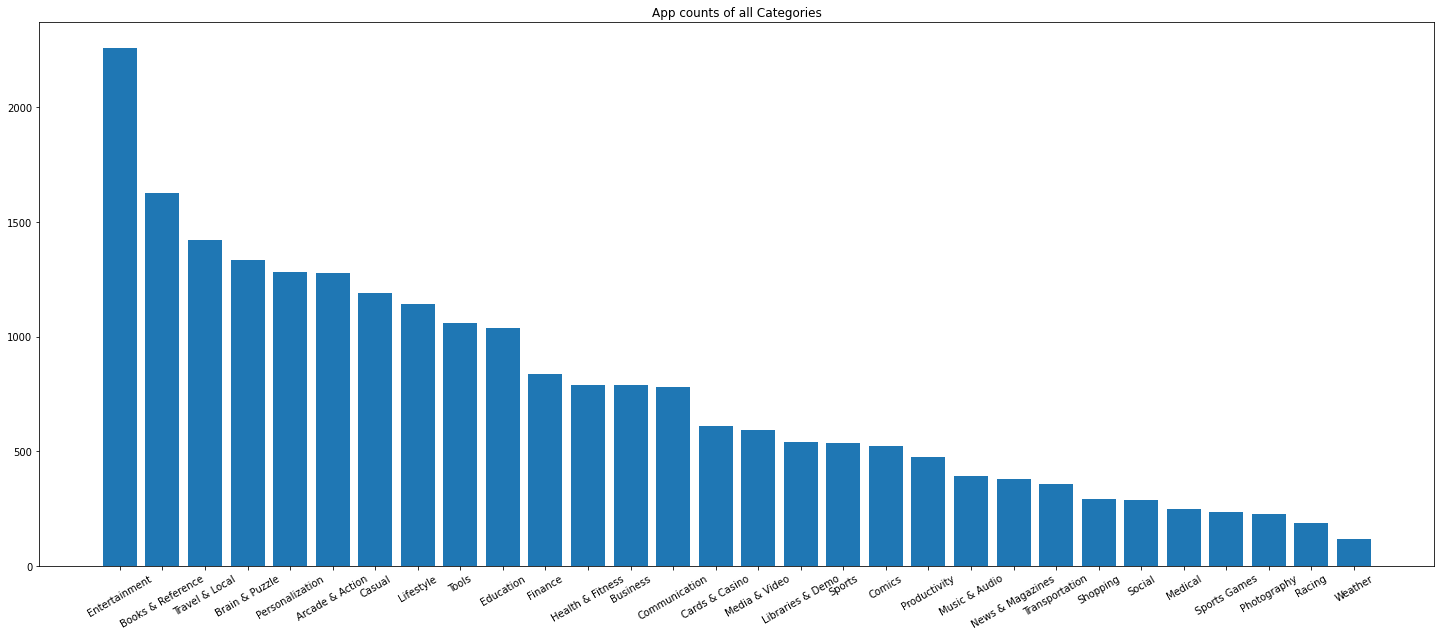

In [ ]:
# Chart - 1 visualization code
# Graph - 1
# Print the total number of unique categories
num_categories = len(df["Category"].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = df["Category"].value_counts().sort_values(ascending = False)

# Plotting bar graph to visualise different categories
plt.figure(figsize=(25,10))
plt.bar(num_apps_in_category.index, # index = category name
        num_apps_in_category.values) # value = count
plt.xticks(rotation=30)   
plt.title('App counts of all Categories')
plt.show()

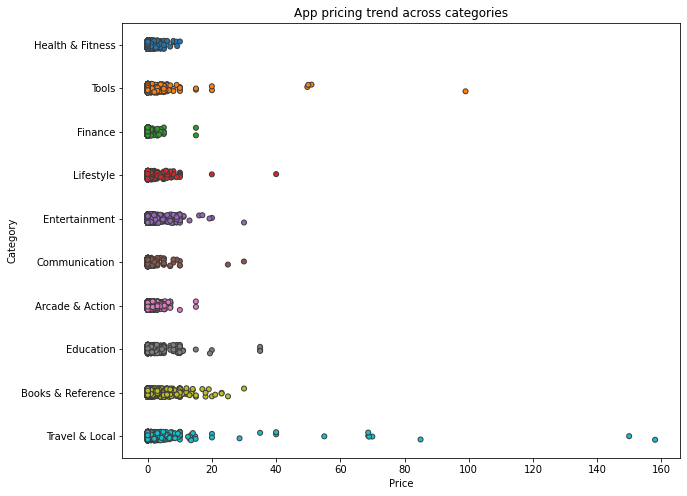

In [ ]:
# GRAPH - 2
# Select a few popular app categories
popular_app_cates = df[df.Category.isin(['Entertainment','Travel & Local','Books & Reference','Arcade & Action','Brain & Puzzel','Causual','Personalisation','Lifestyle','Tools',
                                         'Education','Communication','Finance','Health & Fitness','Buisness'])]

# Examine the price trend by plotting Price vs Category
plt.figure(figsize=(10,8))

# Ploting Strip plot of price & category 
ax = sns.stripplot(x = popular_app_cates["Price"], y = popular_app_cates["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

plt.show()

In [ ]:
# Apps whose Price is greater than 100
apps_above_100 = df[['Category', 'App', 'Price']][df["Price"] > 100]
apps_above_100

,Category,App,Price
15934,Travel & Local,CoPilot Truck UK + IRE,158.07
18890,Travel & Local,CoPilot Truck USA & CAN,149.99
29041,Transportation,NavTruck Regional,139.99


In [ ]:
# Apps whose Price is between 50 And 100
bet50_100 = df[['Category', 'App', 'Price']][(df['Price'] >= 50) & (df['Price'] < 100)]
bet50_100

,Category,App,Price
1395,Travel & Local,CoPilot Live Europe,84.99
16389,Travel & Local,CoPilot Live Premium Europe,54.99
10600,Tools,Compass Emergency Recovery,51.00
22121,Medical,Handbook,65.00
9596,Medical,Handbook of Massachusetts,59.95
22712,Travel & Local,NAVIGON East EU North,68.69
397,Travel & Local,NAVIGON Europe,69.95
5227,Travel & Local,NAVIGON Nordics,68.92
10453,Travel & Local,NAVIGON UK,68.69
13640,Medical,Pschyrembel KW 2012,65.97


##### 1. Why did you pick the specific chart?

A **bar plot** in Python is a visual representation of data using bars of different heights. It is a type of plot that displays the relationship between a variable and one or more other variables, usually in the form of a bar chart. A bar plot can indicate the differences between groups and makes it easy to compare the same data points across multiple categories. Bar plots are commonly used in data visualization to display quantitative information about a set of variables.

A **strip plot** is a type of data visualization that displays a set of points or markers along a horizontal or vertical axis. This type of plot is often used to show relationships between two variables. The data points can be connected by lines or an area chart, allowing viewers to quickly see how the data relates. Strip plots are also commonly used to highlight outliers or unusual values in the data set.

##### 2. What is/are the insight(s) found from the chart?

**GRAPH - 1:** We can see that there are 30 unique app categories present in our dataset. Entertainment apps have the highest market prevalence. After that Travel & Local has a prevalence. Interestingly, Books & Reference, Arcade & Action, Brain & Puzzle and Casual apps have slightly equal weightage of market prevalence.

**GRAPH - 2:** There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. 

Different categories demand different price ranges. Some apps that are simple and used daily should probably be kept free. Here, we see that Travel & Local app are the most expensive. Entertainment and Education app has almost same pricing range.


#### Chart - 2 Rating Vs. Total Counts & Price of Mobile Apps (Bivariate Plots)

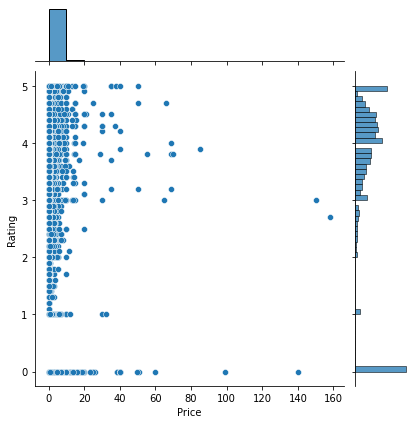

In [ ]:
# Chart - 2 visualization code
# GRAPH - 1
# Filter rows where both Rating and Price values are not null
apps_with_price_and_rating_present = df[(~df["Rating"].isnull()) & (~df["Price"].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_price_and_rating_present.groupby("Category")#.filter(lambda x: len(x) >= 250).reset_index()

# Plot price vs. rating
sns.jointplot(x = df["Price"], y = df["Rating"])
plt.show()

Number of average rating =  4.0


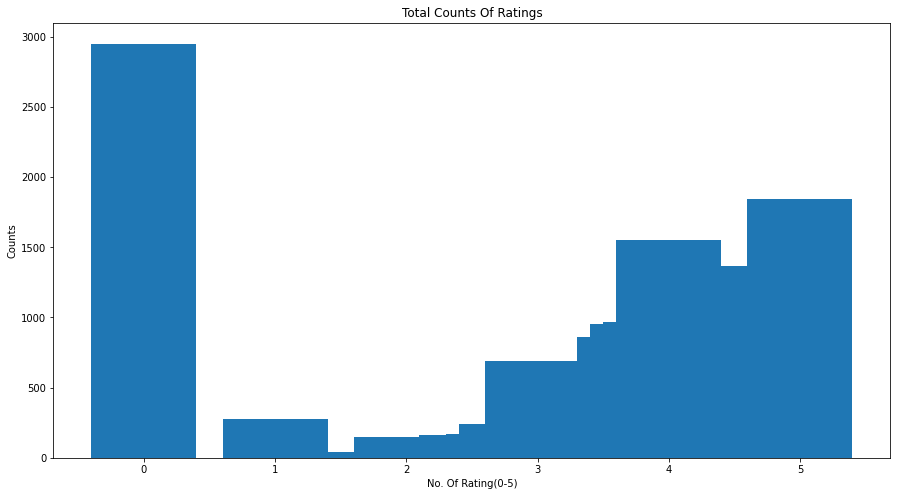

In [ ]:
# Graph - 2
# Print the total number of average rating
num_rating = df["Rating"].median()
print('Number of average rating = ', num_rating)

# Count the number of apps in each 'Category' and sort them in descending order
num_rating_counts = df["Rating"].value_counts().sort_values()

#Plotting bar graph to visualise different categories
plt.figure(figsize=(15,8))
plt.bar(num_rating_counts.index,       # index = ratings (0-5 star)
        num_rating_counts.values)      # value = count 
plt.xlabel('No. Of Rating(0-5)')
plt.ylabel('Counts')
plt.title('Total Counts Of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A **Jointplot** comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X). The third plot is placed on the right margin of the bivariate graph with the orientation set to vertical and it shows the distribution of the dependent variable(Y). It is very helpful to have univariate and bivariate plots together in one figure. This is because the univariate analysis focuses on one variable, and the bivariate analysis explores the relationship between two variables and also describes the strength of their relationship. 

A **bar plot** in Python is a visual representation of data using bars of different heights. It is a type of plot that displays the relationship between a variable and one or more other variables, usually in the form of a bar chart. A bar plot can indicate the differences between groups and makes it easy to compare the same data points across multiple categories. Bar plots are commonly used in data visualization to display quantitative information about a set of variables.



##### 2. What is/are the insight(s) found from the chart?

**GRAPH - 1:** It is showing the relation between ratings and price of the app. This graph can analyze us that does the price of an app affect its rating?
We find that the majority of top rated apps (rating over 4) range has the vast majority of apps price themselves under $10.

**GRAPH - 2:** After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our graph no. 2, we found that the average number of ratings across all app categories is 4.0 . Also we have large amount of app with 0 ratings.

#### Chart - 3 Category Vs. Dangerous Permission Count and Safe Permission Count 

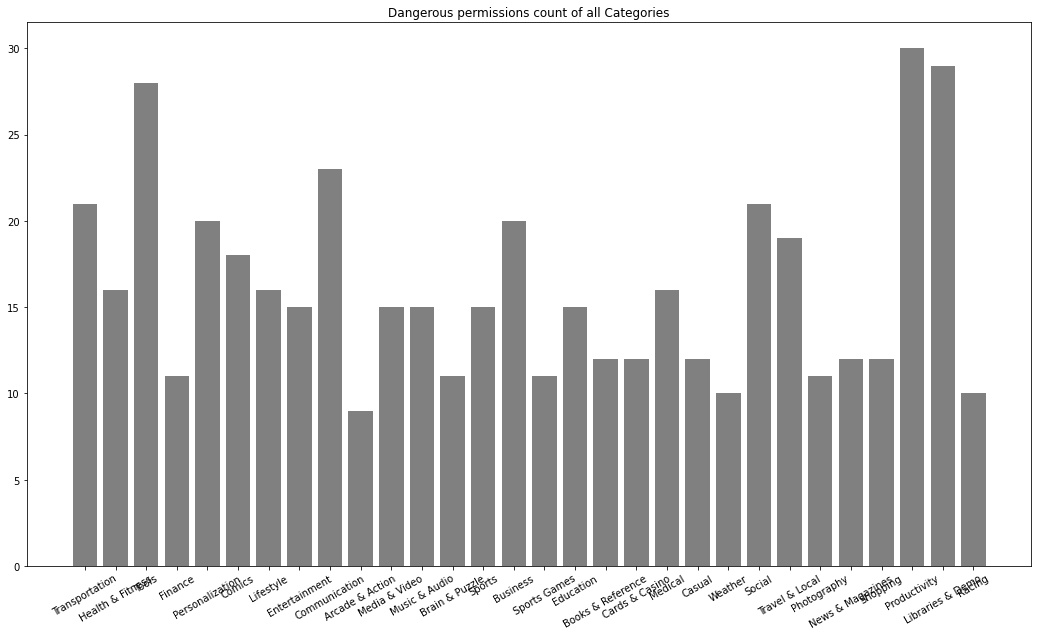

In [ ]:
# Chart - 3 Visualization Code
# Graph - 1
y = df['Dangerous permissions count']
x = df["Category"]

# Plotting bar graph to visualise different categories
plt.figure(figsize=(18,10))
plt.bar(x, y, color='gray')
plt.title('Dangerous permissions count of all Categories')
plt.xticks(rotation=30)
plt.show()


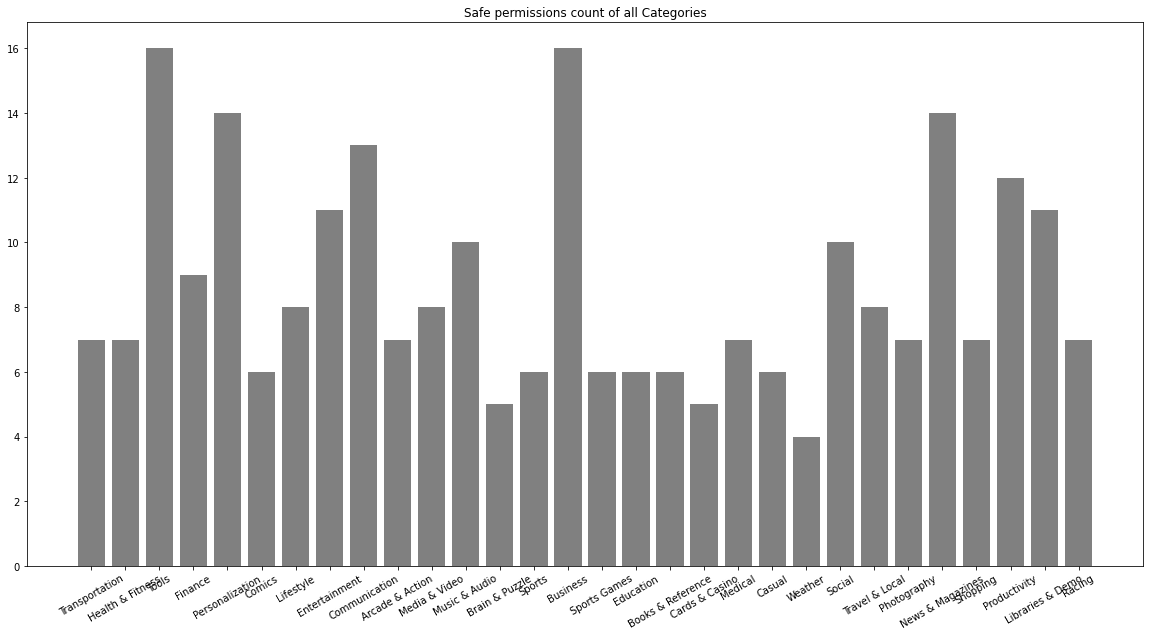

In [ ]:
# Graph - 2
x = df["Category"]
y = df['Safe permissions count']

# Plotting bar graph to visualise different categories
plt.figure(figsize=(20,10))
plt.bar(x, y, color='gray')
plt.title('Safe permissions count of all Categories')
plt.xticks(rotation=30)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 4 Category Vs. Rating and No. of Ratings (Univariate with Categorical and Numerical)

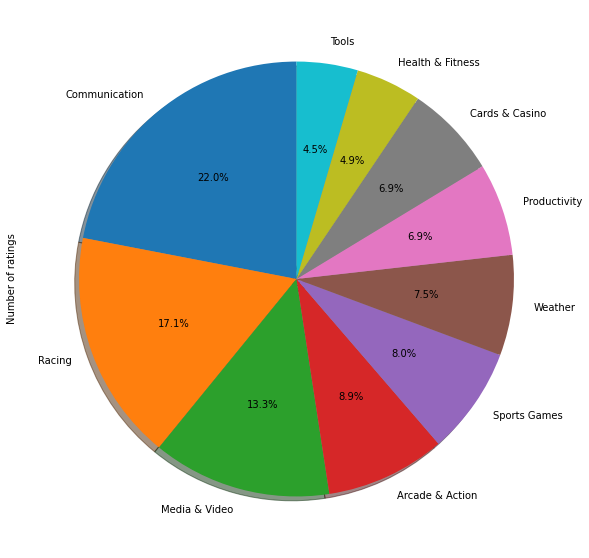

In [ ]:
# Chart - 4 visualization code
# Graph - 1
# Pie Plot of group of data by Category and Median of Number of Ratings for each Category
# For Top 10 category only
df.groupby('Category')['Number of ratings'].median().sort_values(ascending=False).head(10).plot(kind='pie',
                                                                                                figsize=(20,10),
                                                                                                autopct="%1.1f%%",
                                                                                                startangle=90,
                                                                                                shadow=True) 
                                
plt.show()

##### 1. Why did you pick the specific chart?

A **pie chart** is a circular graphical representation of data in which the individual categories are represented as slices that represent the relative size or proportion of each category. It is usually used to show relative proportions of different categories of data. So, we used Pie chart which helped me to get the rating and no. of ratings percentage comparision of the different categories.


##### 2. What is/are the insight(s) found from the chart?

**GRAPH -1:** This pie plot shows us that category of Racing, Communication & Productivity has almost equal average of number of ratings. Other categories has slightly less number of average rating.

**GRAPH-2:** As ratings is important for mobile app to get a popularity, we are checking here the average rating of different category. Every category has equal weightage of average ratings.

#### Chart - 5

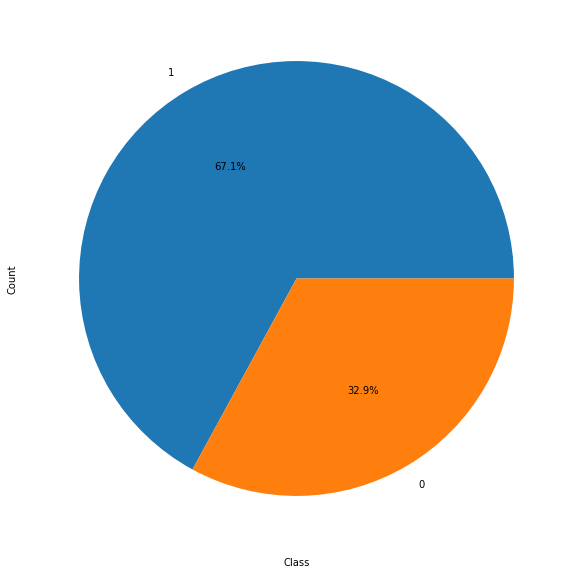

In [ ]:
# Chart - 5 visualization code
import pandas as pd
import matplotlib.pyplot as plt

# assume your data is in a pandas dataframe df with a 'class' column
class_counts = df['Class'].value_counts()
class_counts.plot(kind='pie',figsize=(10,10),autopct="%1.1f%%")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

To check the data Imbalancement

##### 2. What is/are the insight(s) found from the chart?

Our Data is imbalanced
To handle imbalanced data, there are several techniques we can use, such as:

* Undersampling: randomly removing samples from the majority class to balance the class distribution.
* Oversampling: randomly duplicating samples from the minority class to balance the class distribution.
* Synthetic data generation: using techniques like SMOTE to generate synthetic samples for the minority class.
* Class weighting: assigning higher weights to the minority class during model training to compensate for the class imbalance.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 - Correlation Heatmap

In [ ]:
cvdf = df.iloc[:,:10]

In [ ]:
# Correlation Heatmap visualization code
# assume your data is in a pandas dataframe df with multiple features and a 'class' column
corr_matrix = cvdf.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_matrix.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count
Rating,1.00,0.06,-0.15,0.08,0.12
Number of ratings,0.06,1.00,-0.02,0.11,0.12
Price,-0.15,-0.02,1.00,-0.00,-0.04
Dangerous permissions count,0.08,0.11,-0.00,1.00,0.70
Safe permissions count,0.12,0.12,-0.04,0.70,1.00


##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

We can see the relation between the variables. All the given variable has negetive correlation with the price this means as price is incresing, rating and number of ratings is decresing. While dangerous count has no correlation with the price.

Rest all correlation can be depicted from the above chart.

#### Chart - 15 - Pair Plot 

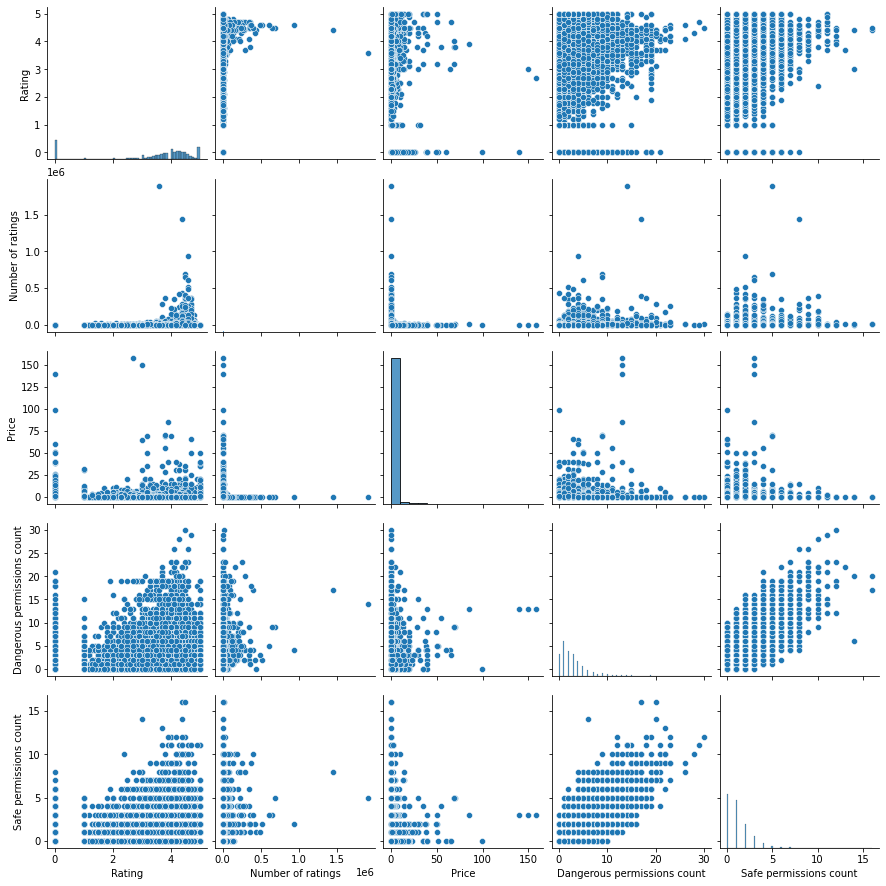

In [ ]:
# Pair Plot visualization code
cvdf = df.iloc[:,:10]
sns.pairplot(cvdf)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, we used pair plot to analyse the patterns of data and realationship between the first 10 important features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we got to know, there are less linear relationship between variables and data points aren't linearly separable. some data is clusetered and ovearlapped each other. Dangerous Permission Count and Safe Permission Count has slightly linear realtionship. Rest insights can be depicted from the above graph.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1 : The app's rating is a significant predictor of its authenticity

#### 1. Stating our research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis:** The app's rating is not significantly related to its authenticity.
* **Alternative hypothesis:** The app's rating is significantly related to its authenticity.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Separate the ratings into two groups based on Class
authentic_ratings = df[df['Class'] == 1]['Rating']
fake_ratings = df[df['Class'] == 0]['Rating']

# Test assumptions
# Check if the variances of the two groups are equal
var_equal = stats.levene(authentic_ratings, fake_ratings)[1] > 0.05
# Check if the df follows a normal distribution
normal_dist = stats.shapiro(df['Rating'])[1] > 0.05

# Conduct the t-test
if var_equal and normal_dist:
    t_stat, p_val = stats.ttest_ind(authentic_ratings, fake_ratings, equal_var=True)
else:
    t_stat, p_val = stats.ttest_ind(authentic_ratings, fake_ratings, equal_var=False)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_val)


t-statistic: -46.715659670212105
p-value: 0.0


##### Which and Why did we choose the specific statistical test?

The t-statistic represents the difference between the means of the two groups (authentic and fake app ratings) relative to the variability in the data. In this case, the negative t-statistic value indicates that the mean rating of the fake apps is lower than the mean rating of the authentic apps.

The p-value is the probability of observing the difference in mean ratings between the authentic and fake apps, or a more extreme difference, assuming that the null hypothesis (that there is no significant relationship between app rating and authenticity) is true. A p-value of 0.0 means that the probability of observing the difference in mean ratings or more extreme differences is extremely low, virtually zero. Therefore, we reject the null hypothesis and conclude that there is a statistically significant relationship between app rating and authenticity.

In summary, the output suggests that the app's rating is a significant predictor of its authenticity, and the mean rating of authentic apps is significantly higher than that of fake apps.





### Hypothetical Statement - 2: The app's category is a significant predictor of its authenticity.


#### 1. Stating our research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis:** The app's category is not significantly related to its authenticity.
* **Alternative hypothesis:** The app's category is significantly related to its authenticity.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Create a contingency table of observed frequencies
cont_table = pd.crosstab(df['Class'], df['Category'])

# Conduct the chi-square test
chi_stat, p_val, dof, expected = stats.chi2_contingency(cont_table)

print("Chi-square statistic:", chi_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_val)


Chi-square statistic: 5080.421312454469
Degrees of freedom: 29
p-value: 0.0


##### Which and Why did we choose the specific statistical test?

The chi-square statistic measures the difference between the observed and expected frequencies in each cell of the contingency table. In this case, the large chi-square statistic indicates a significant difference between the observed and expected frequencies, suggesting that there is a relationship between app category and authenticity.

The degrees of freedom represent the number of independent observations in the contingency table. In this case, the degrees of freedom is 29, which is the number of categories minus one, multiplied by the number of authenticity levels minus one.

The p-value is the probability of observing the relationship between app category and authenticity, or a more extreme relationship, assuming that there is no relationship between the two variables (i.e., the null hypothesis). A p-value of 0.0 indicates that the probability of observing the relationship or a more extreme relationship by chance is essentially zero. Therefore, we reject the null hypothesis and conclude that there is a statistically significant relationship between app category and authenticity.

In summary, the output suggests that the app's category is a significant predictor of its authenticity, and there is a significant relationship between app category and authenticity.




### Hypothetical Statement - 3: The number of reviews is a significant predictor of an app's authenticity.

#### 1. Stating our research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis:** The number of reviews is not significantly related to an app's authenticity.
* **Alternative hypothesis:** The number of reviews is significantly related to an app's authenticity



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Define the contingency table
contingency_table = pd.crosstab(df['Class'], df['Number of ratings'])

# Conduct the chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)


Chi-square statistic: 8568.326856007443
Degrees of freedom: 3691
p-value: 0.0


##### Which and Why did we choose the specific statistical test?

The result of the chi-square test in the code provided indicates that the p-value is 0.0, which is less than the typical significance level of 0.05. This means that we reject the null hypothesis that the number of ratings is not significantly related to the Class of the app and conclude that there is a significant relationship between the number of ratings and the Class of the app.

The chi-square statistic is a measure of how different the observed values are from the expected values under the null hypothesis. In this case, the observed values are the contingency table of the number of ratings and Class, and the expected values are calculated assuming the null hypothesis is true. The degrees of freedom tell us how many values can vary freely in the chi-square distribution. The large chi-square statistic and degrees of freedom indicate that there are many categories with large differences between the observed and expected values, supporting the conclusion of a significant relationship between the number of ratings and the Class of the app.



